# Проект: Статистический анализ данных

**Задание:**
- проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Даны данные о некоторых пользователях из нескольких городов, а также об их поездках. 

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 

Сервисом можно пользоваться:

без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;
    
с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

## Шаг 1. Загрузка данных

In [2]:
#таблица с пользователями
df_users = pd.read_csv('...csv')
df_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
#таблица с поездками
df_rides = pd.read_csv('...csv')
df_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [6]:
#таблица с подписками
df_subscriptions = pd.read_csv('...csv')
df_subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [7]:
df_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В таблице пользователей содержится 1565 записей, включающих данные о пользователях: идентификаторы, имена, возраст, города и типы подписок. Все типы данных корректны, пропущенные значения отсутствуют.

В таблице поездок имеется 18068 записей с данными о поездках: идентификаторы пользователей, дистанция, продолжительность и дата каждой поездки. Столбец date имеет тип 'object' и требует преобразования в формат даты.

В таблице подписок 2 записи и представлена информация о доступных подписках, о типах подписок, стоимость за минуту, начальную стоимость поездки и ежемесячную плату. Нет проблем с типами данных или пропущенными значениями.

## Шаг 2. Предобработка данных

In [8]:
# изменим тип в 'date' на datetime
df_rides['date'] = pd.to_datetime(df_rides['date'], format='%Y-%m-%d')

# cоздадим новый столбец с номером месяца на основе столбца date
df_rides['month'] = df_rides['date'].dt.month
df_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Опираясь на общую информацию о датафреймах, сделан вывод, что пропусков в датафреймах не обнаружено. Таблицу с информацией о подписках мы видим полностью, пропусков или дубликатов в ней нет.

In [9]:
#посмотрим кол-во дубликатов в таблице с поездками
df_rides.duplicated().sum()

0

In [10]:
#посмотрим кол-во дубликатов в таблице с пользователями
df_users.duplicated().sum()

31

In [11]:
#удалим дубликаты и выведем код выше еще раз для проверки 
df_users = df_users.drop_duplicates()
df_users.duplicated().sum()

0

В таблице с пользователями удалены дубликаты, в таблице с поездками изменен тип даты. 

## Шаг 3. Исследовательский анализ данных

**3.1 частота встречаемости городов;**

In [12]:
city_counts = df_users['city'].value_counts()
city_counts

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

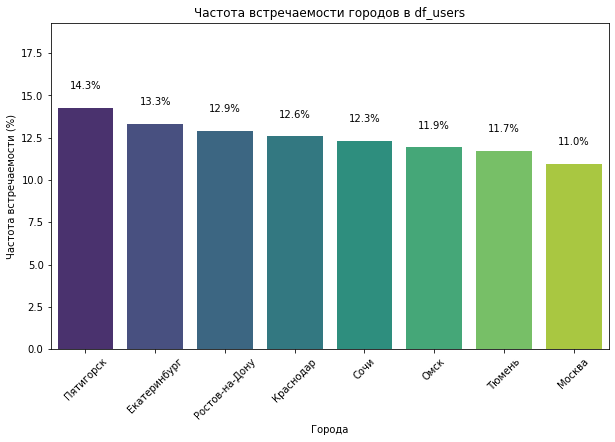

In [13]:
#преобразование частот в проценты
city_percentages = (city_counts / city_counts.sum()) * 100

#построение графика
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=city_percentages.index, y=city_percentages.values, palette="viridis")

#добавление процентов на столбцы
for index, value in enumerate(city_percentages.values):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', va='bottom')

plt.xlabel('Города')
plt.ylabel('Частота встречаемости (%)')
plt.title('Частота встречаемости городов в df_users')
plt.xticks(rotation=45)
plt.ylim(0, max(city_percentages.values) + 5)
plt.show()

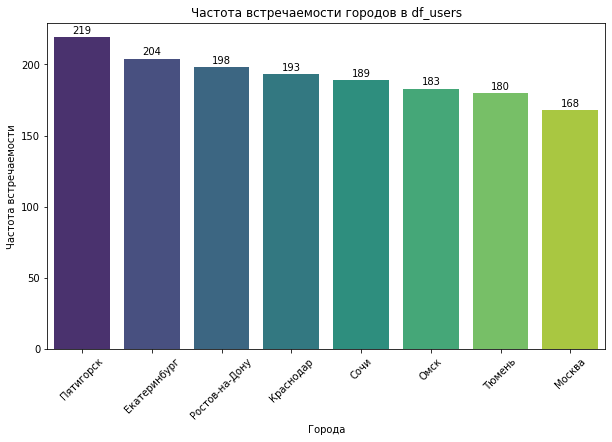

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")

# Добавление значений над столбцами
for index, value in enumerate(city_counts.values):
    plt.text(index, value + 1, f'{value}', ha='center', va='bottom')

plt.xlabel('Города')
plt.ylabel('Частота встречаемости')
plt.title('Частота встречаемости городов в df_users')
plt.xticks(rotation=45)
plt.ylim(0, max(city_counts.values) + 10)
plt.show()

Наибольшее количество пользователей из Пятигорска — 219 (14.28%). Наименьшее количество пользователей из Москвы — 168 (10.95%).

**3.2 соотношение пользователей с подпиской и без подписки;**

In [15]:
#оценим записи в 'subscription_type'
subscription_counts = df_users['subscription_type'].value_counts()
subscription_counts

free     835
ultra    699
Name: subscription_type, dtype: int64

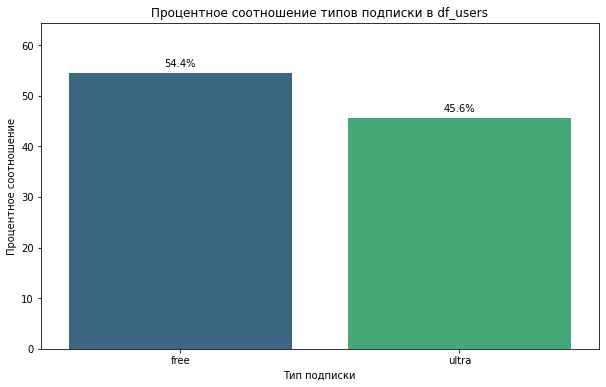

In [16]:
#преобразование частот в проценты
subscription_percentages = (subscription_counts / subscription_counts.sum()) * 100

#построение графика
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=subscription_percentages.index, y=subscription_percentages.values, palette="viridis")

#добавление процентов на столбцы
for index, value in enumerate(subscription_percentages.values):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', va='bottom')

plt.xlabel('Тип подписки')
plt.ylabel('Процентное соотношение')
plt.title('Процентное соотношение типов подписки в df_users')
plt.xticks(rotation=0)
plt.ylim(0, max(subscription_percentages.values) + 10)
plt.show()


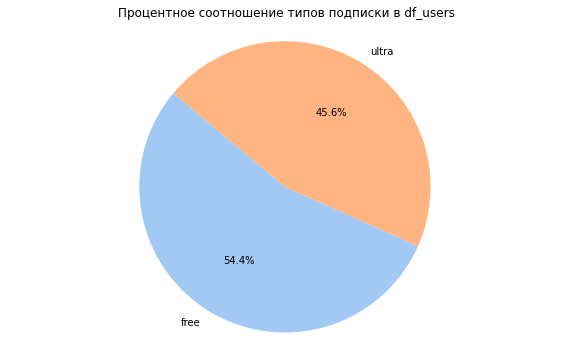

In [17]:
plt.figure(figsize=(10, 6))
plt.pie(subscription_percentages, labels=subscription_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))

plt.title('Процентное соотношение типов подписки в df_users')
plt.axis('equal')

plt.show()

Пользователей с подпиской «free» насчитывается 835, что составляет 54,43% от общего числа и на 136 больше, чем пользователей с подпиской «ultra».

**3.3 возраст пользователей;**

In [18]:
age_counts = df_users['age'].value_counts()
age_counts

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64

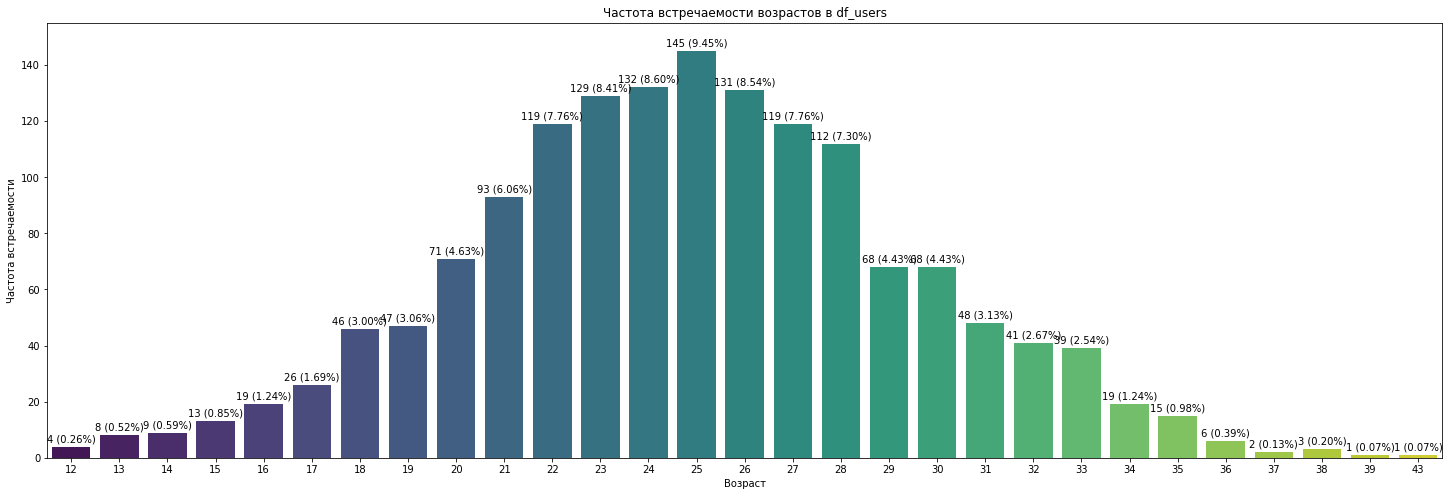

In [19]:
#преобразуем частоты в проценты
age_percentages = (age_counts / age_counts.sum()) * 100

#сортируем данные по возрастанию возраста
age_counts_sorted = age_counts.sort_index()
age_percentages_sorted = age_percentages.sort_index()

#построение графика
plt.figure(figsize=(25, 8))
barplot = sns.barplot(x=age_counts_sorted.index, y=age_counts_sorted.values, palette="viridis")

#добавляем частоты над столбцами
for index, (age, value) in enumerate(age_counts_sorted.items()):
    percentage = age_percentages_sorted[age]
    barplot.text(index, value + 1, f'{value} ({percentage:.2f}%)', ha='center', va='bottom')

plt.xlabel('Возраст')
plt.ylabel('Частота встречаемости')
plt.title('Частота встречаемости возрастов в df_users')
plt.xticks(rotation=0)
plt.ylim(0, max(age_counts_sorted.values) + 10) 
plt.show()

In [20]:
df_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

От 12 до 43 лет - это возрастной диапазон пользователей сервиса аренды самокатов. График распределения возрастов демонстрирует нормальную кривую, а наивысшее количество пользователей отмечается в возрасте 25 лет, который также является медианным значением. По закону с 1 марта 2023 года, дети от 7 до 14 лет могут перемещаться на электросамокате самостоятельно только по велосипедным и пешеходным дорожкам. Но каждый сервис аренды самокатов может устанавливать свои правила в отношении управления самокатов детьми (в основном, на данных момент ограничение сервисов - 18+). Нужно учесть, что у нас данные за 2021 год, вероятно, тогда кикшеринговые компании разрешали управление своими самокатами с 12 лет.  

**3.4 расстояние, которое пользователь преодолел за одну поездку;**

In [21]:
df_rides['distance'].describe().round(2).to_frame()

,distance
count,18068.00
mean,3070.66
std,1116.83
min,0.86
25%,2543.23
50%,3133.61
75%,3776.22
max,7211.01


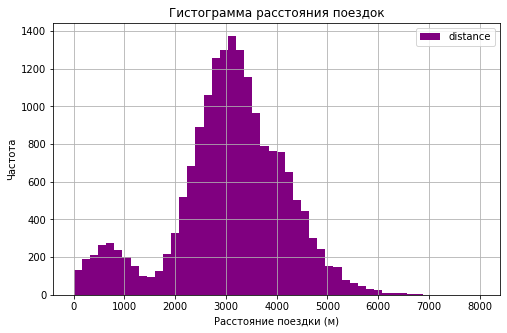

In [22]:
# Построение гистограммы
ax = df_rides.plot(y='distance', 
                   kind='hist', 
                   bins=50, 
                   grid=True, 
                   figsize=(8, 5), 
                   range=(0, 8000), 
                   color='purple', 
                   title='Гистограмма расстояния поездок')
ax.set_xlabel('Расстояние поездки (м)')
ax.set_ylabel('Частота')

plt.show()

In [23]:
(df_rides[df_rides['distance'] < 1000]).describe()

,user_id,distance,duration,month
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,977.518222,549.248484,9.555959,6.568513
std,386.254751,265.731473,3.823324,3.506851
min,1.000000,0.855683,2.035632,1.000000
25%,760.000000,333.796146,6.397153,3.000000
50%,1030.000000,574.118578,9.336174,7.000000
75%,1285.500000,771.980411,12.832299,10.000000
max,1534.000000,999.531884,18.235650,12.000000


Расстояние за одну поездку от 1 до 7200 метров. На графике наблюдаются два выраженных пика: первый - около 700 метров, а второй - около 3200 метров. Между этими пиками значения распределены нормально. Медианное значение - 3133 метра.

**3.5 продолжительность поездок.**

In [24]:
df_rides['duration'].describe().round(2).to_frame()

,duration
count,18068.00
mean,17.81
std,6.09
min,0.50
25%,13.60
50%,17.68
75%,21.72
max,40.82


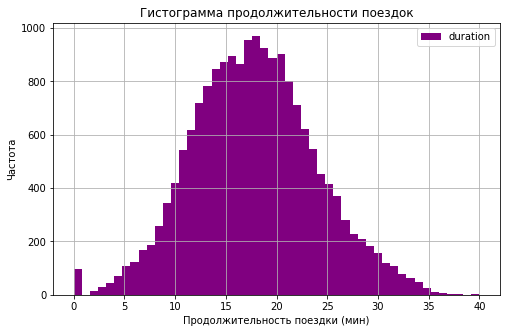

In [25]:
ax = df_rides.plot(y='duration', 
              kind='hist', 
              bins=50, 
              grid=True, 
              figsize=(8,5), 
              range=(0,40), 
              color='purple', 
              title='Гистограмма продолжительности поездок')
ax.set_xlabel('Продолжительность поездки (мин)')
ax.set_ylabel('Частота')

plt.show()

In [26]:
df_rides[df_rides['duration'] < 1]

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


In [27]:
(df_rides[df_rides['duration'] < 1]).describe()

,user_id,distance,duration,month
count,95.000000,95.000000,95.0,95.000000
mean,1092.210526,5113.176549,0.5,6.484211
std,244.028551,658.254104,0.0,3.709858
min,701.000000,4030.308008,0.5,1.000000
25%,901.000000,4611.510820,0.5,3.000000
50%,1069.000000,5052.769411,0.5,6.000000
75%,1310.500000,5488.459099,0.5,10.000000
max,1524.000000,7211.007745,0.5,12.000000


Продолжительность поездок нормально распределена в диапазоне от 0 до 41 минуты. Наиболее распространенной и одновременно медианным значением продолжительности является 18 минут.

Отмечается некоторая аномалия: имеется небольшое количество поездок продолжительностью минуту, менее 100 случаев. Посмотрим на них внимательнее после объединения таблиц

#### Шаг 4. Объединение данных

**4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм**

In [28]:
df_total = df_users.merge(df_rides, on='user_id').merge(df_subscriptions, on='subscription_type')
df_total

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [29]:
print("Количество строк (поездок) в 'df_rides':", df_rides['user_id'].count())
print("Количество строк (поездок) в 'df_total':", df_total['user_id'].count())
print()
print("Количество уникальных пользователей в 'df_users':", len(df_users['user_id'].unique()))
print("Количество уникальных пользователей в 'df_total':", len(df_total['user_id'].unique()))

Количество строк (поездок) в 'df_rides': 18068
Количество строк (поездок) в 'df_total': 18068

Количество уникальных пользователей в 'df_users': 1534
Количество уникальных пользователей в 'df_total': 1534


Исходные датафреймы не содержат пропусков и количество значений в них соответствует количеству в итоговом датафрейме, значит общий датафрейм не содержит пропусков.

**Вернемся к аномальным значениям в duration**

In [30]:
(df_total[df_total['duration'] < 1]).head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6531,701,Иван,31,Екатеринбург,free,4196.445201,0.5,2021-08-31,8,8,50,0
6570,704,Мирон,29,Ростов-на-Дону,free,4830.824371,0.5,2021-10-14,10,8,50,0
6680,712,Дарья,28,Москва,free,4684.004397,0.5,2021-03-04,3,8,50,0
6695,713,Святослав,30,Краснодар,free,5215.642710,0.5,2021-02-25,2,8,50,0
6768,718,Владислава,31,Москва,free,5197.436649,0.5,2021-02-11,2,8,50,0


In [31]:
(df_total[df_total['duration'] < 1]).describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,95.000000,95.000000,95.000000,95.0,95.000000,95.0,95.0,95.0
mean,1092.210526,25.442105,5113.176549,0.5,6.484211,8.0,50.0,0.0
std,244.028551,4.350876,658.254104,0.0,3.709858,0.0,0.0,0.0
min,701.000000,13.000000,4030.308008,0.5,1.000000,8.0,50.0,0.0
25%,901.000000,22.500000,4611.510820,0.5,3.000000,8.0,50.0,0.0
50%,1069.000000,25.000000,5052.769411,0.5,6.000000,8.0,50.0,0.0
75%,1310.500000,29.000000,5488.459099,0.5,10.000000,8.0,50.0,0.0
max,1524.000000,36.000000,7211.007745,0.5,12.000000,8.0,50.0,0.0


In [32]:
df_total[df_total['duration'] < 1]['subscription_type'].value_counts()

free    95
Name: subscription_type, dtype: int64

In [33]:
df_total[df_total['duration'] < 1].loc[
    df_total[df_total['duration'] < 1]['user_id'].duplicated(keep=False)
]

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
10217,973,Александр,27,Омск,free,4578.711073,0.5,2021-03-01,3,8,50,0
10229,973,Александр,27,Омск,free,5052.769411,0.5,2021-11-27,11,8,50,0
10698,1007,Жанна,33,Пятигорск,free,5245.629783,0.5,2021-04-12,4,8,50,0
10699,1007,Жанна,33,Пятигорск,free,4633.256106,0.5,2021-04-27,4,8,50,0
13698,1224,Александр,25,Пятигорск,free,4430.510768,0.5,2021-01-15,1,8,50,0
13701,1224,Александр,25,Пятигорск,free,6414.516026,0.5,2021-07-15,7,8,50,0
13976,1243,Эдуард,31,Москва,free,4434.740681,0.5,2021-05-31,5,8,50,0
13979,1243,Эдуард,31,Москва,free,5095.432818,0.5,2021-12-02,12,8,50,0
15629,1364,Ян,31,Тюмень,free,4375.042408,0.5,2021-10-23,10,8,50,0
15636,1364,Ян,31,Тюмень,free,4697.638430,0.5,2021-12-20,12,8,50,0


In [34]:
df_total[df_total['user_id'] == 701]

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6518,701,Иван,31,Екатеринбург,free,2676.472894,17.470598,2021-01-23,1,8,50,0
6519,701,Иван,31,Екатеринбург,free,2743.677431,14.974710,2021-02-13,2,8,50,0
6520,701,Иван,31,Екатеринбург,free,2893.656575,11.891791,2021-02-20,2,8,50,0
6521,701,Иван,31,Екатеринбург,free,2802.021357,16.008663,2021-03-12,3,8,50,0
6522,701,Иван,31,Екатеринбург,free,3509.012965,13.081094,2021-04-17,4,8,50,0
6523,701,Иван,31,Екатеринбург,free,2465.852577,14.283970,2021-05-31,5,8,50,0
6524,701,Иван,31,Екатеринбург,free,731.410111,6.657051,2021-06-02,6,8,50,0
6525,701,Иван,31,Екатеринбург,free,3903.210649,18.367706,2021-06-20,6,8,50,0
6526,701,Иван,31,Екатеринбург,free,3441.595717,18.978076,2021-07-04,7,8,50,0
6527,701,Иван,31,Екатеринбург,free,1133.584211,6.250941,2021-07-17,7,8,50,0


In [35]:
df_total[df_total['user_id'] == 713]

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6693,713,Святослав,30,Краснодар,free,3269.315495,10.846357,2021-01-09,1,8,50,0
6694,713,Святослав,30,Краснодар,free,2048.902905,20.146709,2021-01-23,1,8,50,0
6695,713,Святослав,30,Краснодар,free,5215.642710,0.500000,2021-02-25,2,8,50,0
6696,713,Святослав,30,Краснодар,free,2172.023319,14.859021,2021-04-11,4,8,50,0
6697,713,Святослав,30,Краснодар,free,3917.557415,26.081034,2021-05-03,5,8,50,0
6698,713,Святослав,30,Краснодар,free,1824.841240,15.213832,2021-05-23,5,8,50,0
6699,713,Святослав,30,Краснодар,free,195.694445,12.559127,2021-08-02,8,8,50,0
6700,713,Святослав,30,Краснодар,free,2673.846504,10.292309,2021-08-22,8,8,50,0
6701,713,Святослав,30,Краснодар,free,2289.062108,10.735991,2021-09-03,9,8,50,0
6702,713,Святослав,30,Краснодар,free,2816.033461,13.448100,2021-09-10,9,8,50,0


Гипотезы пояления 0,5 в продолжительности поездки:
1) так сокращается ровно 30 минут, так как нет поездок ровно с 30 минутами 
минимальное расстояние в рассматриваемом срезе 4030, что равно поездке со средней скоростью 8.06 км/ч, а максимальное - 7211, 14.42 км/ч. Оба значения реалистичны для кикшеринга. 
2) у пользователей был промокод на поездку, а так как оплата списывается поминутно, а 0,5 - это заглушка
- обычно подобные промокоды выдают новым пользователям, но в нашем срезе первый встречающийся id является постоянным клиентом, также стоит снова обратить внимание минимальное расстояние - 4030, если бы это были промокоды для новых пользователей, точно были бы очень короткие поездки людей, которым не подошел этот вид транспорта.
- можно представить промокод, который выдается за какие-либо извинения от сервиса, например, неисправность уже арендованного самоката, либо в качестве бонуса от сервиса, например, привязка карты определенного банка-партнера

Для точного подтверждения гипотезы нам не хватает данных, так как в нашем срезе есть 5 пользователей, у которых такая длительность дважды, а вероятность, что поездка ровно у одного человека будет дважды 30 минут 00 секунд крайне мала. Оставим данные как есть. 

**4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:**

**c данными о пользователях без подписки;**

**с данными о пользователях с подпиской.**

In [36]:
#датафрейм данных с пользователями с подпиской
df_ultra = df_total.loc[df_total['subscription_type'] == 'ultra']
#датафрейм данных с пользователями без подписки
df_free = df_total.loc[df_total['subscription_type'] == 'free']

In [37]:
df_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


In [38]:
df_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


**4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.**

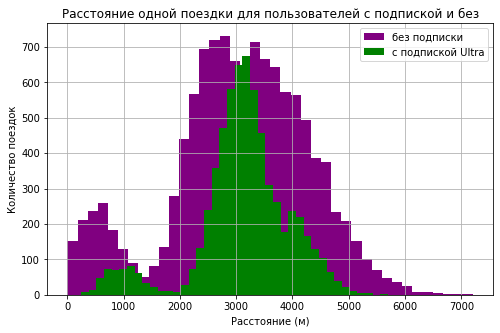

In [39]:
ax = df_free['distance'].plot(kind = 'hist', grid=True, figsize = (8,5), color='purple', bins = 40, label='без подписки')
ax = df_ultra['distance'].plot(kind = 'hist', grid=True, figsize = (8,5), color='green', bins = 40, label='с подпиской Ultra')
plt.title('Расстояние одной поездки для пользователей с подпиской и без')
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество поездок')
plt.legend(loc='upper right')
plt.show()

In [40]:
#получаем описательные статистики для обоих датафреймов
ultra_dstn = df_ultra['distance'].describe()
free_dstn = df_free['distance'].describe()

#объединяем эти описательные статистики в один датафрейм
combined_dstn = pd.DataFrame({
    'Ultra': ultra_dstn,
    'Free': free_dstn
})

combined_dstn

,Ultra,Free
count,6500.000000,11568.000000
mean,3115.445388,3045.495282
std,836.895330,1246.173806
min,244.210438,0.855683
25%,2785.444017,2366.562689
50%,3148.637229,3114.648465
75%,3560.574425,3905.697894
max,5699.769662,7211.007745


Средняя длина поездок и медиана для обоих тарифов близки, но у Ultra они немного выше. Вариативность длины поездок выше у тарифа Free, максимальные значения и верхние квартильные значения указывают на то, что на тарифе Free иногда совершаются значительно более длинные поездки (самая длинная на 1,5 км больше, чем в тарифе Free - 7,2 км). 

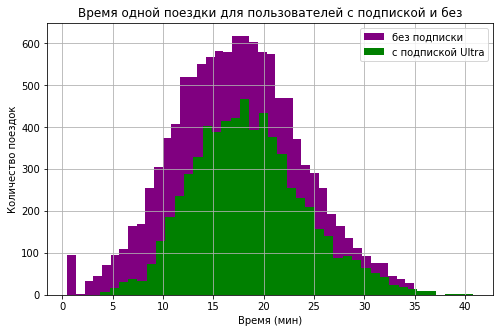

In [41]:
ax = df_free['duration'].plot(kind = 'hist', grid=True, figsize = (8,5), color='purple', bins = 40, label='без подписки')
ax = df_ultra['duration'].plot(kind = 'hist', grid=True, figsize = (8,5), color='green', bins = 40, label='с подпиской Ultra')
plt.title('Время одной поездки для пользователей с подпиской и без')
plt.xlabel('Время (мин)')
plt.ylabel('Количество поездок')
plt.legend(loc='upper right')
plt.show()


In [42]:
#получаем описательные статистики для обоих датафреймов
ultra_drtn = df_ultra['duration'].describe()
free_drtn = df_free['duration'].describe()

#объединяем эти описательные статистики в один датафрейм
combined_drtn = pd.DataFrame({
    'Ultra': ultra_drtn,
    'Free': free_drtn
})

combined_drtn

,Ultra,Free
count,6500.000000,11568.000000
mean,18.541985,17.390909
std,5.572048,6.326803
min,3.760353,0.500000
25%,14.524654,12.958437
50%,18.178153,17.326890
75%,21.884129,21.594071
max,40.823963,34.948498


Средняя и медианная длительность поездок для тарифа Ultra немного выше, чем для тарифа Free.
Вариативность длительности поездок выше у тарифа Free, что указывает на большую разнообразие в поведении пользователей. Минимальные значения указывают на возможность наличия очень коротких поездок или ошибочных записей в данных тарифа Free, возможно, люди пробуют самокат впервые и, не справившись с ним, решают оставить его сразу. 
Максимальная длительность поездок существенно выше для тарифа Ultra, что может свидетельствовать о том, что пользователи этого тарифа совершают более длительные поездки, скорее всего, из-за меньшей цены в минуту.

#### Шаг 5. Подсчёт выручки

**5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.**

In [43]:
#округляем продолжительность поездок в 'duration' в таблице 'df_total' до ближайшего целого числа
df_total['duration'] = np.ceil(df_total['duration'])

#создаем сводную таблицу
users_months = df_total.pivot_table(
    index=('user_id', 'month'), 
    values=(
        'distance', 
        'duration', 
        'minute_price', 
        'start_ride_price', 
        'subscription_fee'
    ), 
    aggfunc=('count', 'sum'))

#переименуем названия столбцов
users_months.columns = [
    'count', 'distance', 
    'count2', 'duration', 
    'count3', 'minute_price',
    'count4', 'start_ride_price', 
    'count5', 'subscription_fee'
]
#удаляем дублирующиеся столбцы с подсчитанным количеством строк 
users_months = users_months.drop(['count2', 'count3', 'count4', 'count5'], axis=1)

#приводим столбцы с ценами к целевому состоянию
users_months['start_ride_price'] = users_months['start_ride_price'] / users_months['count']
users_months['minute_price'] = users_months['minute_price'] / users_months['count']
users_months['subscription_fee'] = users_months['subscription_fee'] / users_months['count']

users_months

count      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0           6.0               0.0   
        4          1    754.159807       7.0           6.0               0.0   
        8          2   6723.470560      46.0           6.0               0.0   
        10         2   5809.911100      32.0           6.0               0.0   
        11         3   7003.499363      56.0           6.0               0.0   
...              ...           ...       ...           ...               ...   
1534    6          2   3409.468534      26.0           8.0              50.0   
        8          2   7622.453034      48.0           8.0              50.0   
        9          1   4928.173852      23.0           8.0              50.0   
        11         4  13350.015305      78.0           8.0              50.0   
        12         1   2371.711192      16.0           8.0              50.0   

               subscription_fee  
user_id month                    
1       1                 199.0  
        4                 199.0  
        8                 199.0  
        10                199.0  
        11                199.0  
...                         ...  
1534    6                   0.0  
        8                   0.0  
        9                   0.0  
        11                  0.0  
        12                  0.0  

[11331 rows x 6 columns]

**5.2 Добавим столбец с помесячной выручкой, которую принёс каждый пользователь**


In [44]:
#расчет и округление выручки
users_months['revenue'] = (
    (users_months['start_ride_price'] * users_months['count']) 
    + (users_months['minute_price'] * users_months['duration']) 
    + users_months['subscription_fee']
)
users_months['revenue'] = users_months['revenue'].astype('int')
users_months

count      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0           6.0               0.0   
        4          1    754.159807       7.0           6.0               0.0   
        8          2   6723.470560      46.0           6.0               0.0   
        10         2   5809.911100      32.0           6.0               0.0   
        11         3   7003.499363      56.0           6.0               0.0   
...              ...           ...       ...           ...               ...   
1534    6          2   3409.468534      26.0           8.0              50.0   
        8          2   7622.453034      48.0           8.0              50.0   
        9          1   4928.173852      23.0           8.0              50.0   
        11         4  13350.015305      78.0           8.0              50.0   
        12         1   2371.711192      16.0           8.0              50.0   

               subscription_fee  revenue  
user_id month                             
1       1                 199.0      451  
        4                 199.0      241  
        8                 199.0      475  
        10                199.0      391  
        11                199.0      535  
...                         ...      ...  
1534    6                   0.0      308  
        8                   0.0      484  
        9                   0.0      234  
        11                  0.0      824  
        12                  0.0      178  

[11331 rows x 7 columns]

#### Шаг 6. Проверка гипотез

**6.1 Проверим гипотезу о том,, тратят ли пользователи с подпиской больше времени на поездки. Если да, то пользователи с подпиской могут быть «выгоднее» для компании**

Н0: Средняя продолжительность поездок с подпиской ‘ultra’ и ‘free’ равна.

Н1: Средняя продолжительность поездок с подпиской ‘ultra’ больше, чем с подпиской ‘free’.

In [45]:
alpha = 0.05 
results = st.ttest_ind(df_ultra['duration'], df_free['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


In [46]:
df_ultra['duration'].mean().round(1)

18.5

In [47]:
df_free['duration'].mean().round(1)

17.4

Нулевая гипотеза отвергута, значит пользователи с подпиской трятят больше времени на поездки. 

**6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Проверим, можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров**

Для проверки этого предположения воспользуемся проверкой односторонних гипотез.

H0: Среднее расстояние, преодоленное пользователями с подпиской за одну поездку, равно 3130 метров.

H1: Среднее расстояние, преодоленное пользователями с подпиской за одну поездку, больше 3130 метров.

In [48]:
prev_screens_value = 3130

alpha = 0.05 

results = st.ttest_1samp(
    df_ultra['distance'], 
    prev_screens_value,
    alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


In [49]:
df_ultra['distance'].mean().round(1)

3115.4

Поскольку p-значение больше уровня статистической значимости, нет причин для того, чтобы отвергнуть нулевую гипотезу. Средняя дистанция поездки пользователей с подпиской меньше 3130 метров, соответственно компания может учитывать это при планировании обновления и ремонта парка самокатов.

**6.3 Проверим, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.**

Для проверки этого предположения воспользуемся гипотезой о равенстве средних для зависимых выборок. Этот метод подойдет для этой генеральной совокупности данных, в которых есть только один отличающийся признак.

Н0: Помесячная средняя выручка от пользователей с подпиской равна помесячной средней выручке от пользователей без подписки.

Н1: Помесячная средняя выручка от пользователей с подпиской больше помесячной средней выручки от пользователей без подписки.

In [50]:
results = st.ttest_ind(
    users_months.loc[users_months['subscription_fee'] > 0, 'revenue'], 
    users_months.loc[users_months['subscription_fee'] == 0, 'revenue'], 
    equal_var=True, 
    alternative='greater')
print(results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


1.8850394384715216e-31
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, есть основания утверждать, что средняя месячная выручка от пользователей с подпиской, больше средней месячной выручки от пользователей без подписки, при установленном уровне значимости.

**6.4 Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобился бы для проверки этой гипотезы?**

Для проверки гипотезы о том, что количество обращений в техподдержку значимо снизилось после обновления серверов, можно использовать парный t-тест для зависимых выборок. Этот тест подходит для сравнения двух наборов связанных данных, например, количества обращений до и после обновления серверов для одних и тех же пользователей.
Если необходимо проверить, что истинное среднее значение генеральной совокупности до изменения больше, чем истинное среднее значение генеральной совокупности после изменения, следует указать параметр alternative="less".
Поскольку гипотеза состоит в том, что количество обращений после обновления серверов должно снизиться, нужно использовать параметр alternative='greater', чтобы проверить, является ли среднее количество обращений до обновления больше, чем после обновления.

**Общий вывод**

В рамках проекта был проведен анализ данных сервиса аренды самокатов. 
- В процессе предобработки были исправлены типы данных, созданы необходимые столбцы и удалены дубликаты. 
- В исследовательском анализе данных выяснилось, что количество пользователей с подпиской «free» составляет 835 человек, что эквивалентно 54.43% от общего числа пользователей и на 136 больше, чем пользователей с подпиской «ultra». 
- Возраст пользователей сервиса варьируется от 12 до 43 лет, с наибольшим числом пользователей в возрасте 25 лет, который также является медианным возрастом. 
- Наибольшее количество поездок (219) было совершено в Пятигорске, а наименьшее (168) - в Москве. 
- Длина одной поездки варьируется от 1 до 7211 метров, при этом медиана составляет 3134 метра. 
- Пользователи с подпиской проводят больше времени в поездках, проезжая в среднем меньше оптимального расстояния с точки зрения износа самоката, а также приносят больше дохода в месяц по сравнению с пользователями без подписки.